# **Machine Learning Code for SI Model and Visualization Using Graph**

In [16]:
import pandas as pd

In [17]:
import numpy as np

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [19]:
import matplotlib.pyplot as plt

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LambdaCallback

## **Solving SI Model Using Euler's Method and Plotting graph**




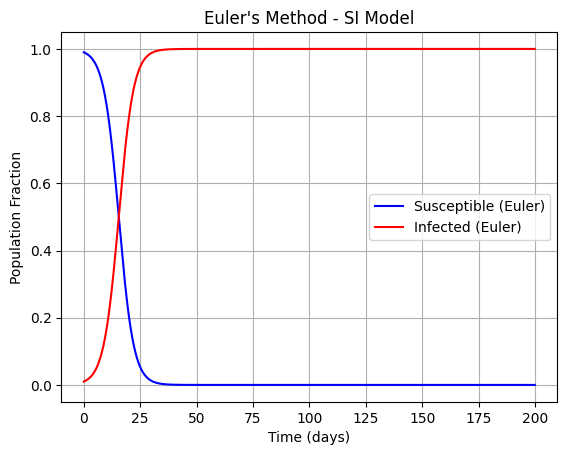

In [22]:
#Solving SI Model Using Euler's Method and Plotting graph
beta = 0.3
S0 = 0.99
I0 = 0.01
T = 200
dt = 0.1
def euler_method(beta, S0, I0, T, dt):
    time_steps = int(T / dt)
    S = np.zeros(time_steps)
    I = np.zeros(time_steps)
    t = np.zeros(time_steps)
    S[0] = S0
    I[0] = I0

    for step in range(1, time_steps):
        t[step] = step * dt
        dS = -beta * S[step - 1] * I[step - 1] * dt  # Infection spread
        dI = beta * S[step - 1] * I[step - 1] * dt  # Newly infected

        S[step] = S[step - 1] + dS
        I[step] = I[step - 1] + dI

    return t, S, I
t_euler, S_euler, I_euler = euler_method(beta, S0, I0, T, dt)
plt.plot(t_euler, S_euler, label='Susceptible (Euler)', color='blue')
plt.plot(t_euler, I_euler, label='Infected (Euler)', color='red')
plt.title("Euler's Method - SI Model")
plt.xlabel("Time (days)")
plt.ylabel("Population Fraction")
plt.legend()
plt.grid()
plt.show()

## **Solving SI model using Runge Kutta fourth order method and visualization using graph**

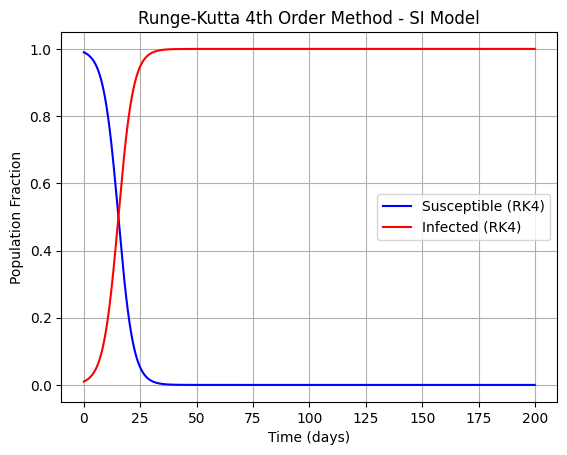

In [23]:
#Solving SI model using Runge Kutta fourth order method and visualization using graph
def rk4_method(beta, S0, I0, T, dt):
    time_steps = int(T / dt)
    S = np.zeros(time_steps)
    I = np.zeros(time_steps)

    S[0] = S0
    I[0] = I0

    for h in range(1, time_steps):
        time = h * dt

        s1 = -beta * S[h - 1] * I[h - 1]
        i1 = beta * S[h - 1] * I[h - 1]

        s2 = -beta * (S[h - 1] + 0.5 * s1 * dt) * (I[h - 1] + 0.5 * i1 * dt)
        i2 = beta * (S[h - 1] + 0.5 * s1 * dt) * (I[h - 1] + 0.5 * i1 * dt)

        s3 = -beta * (S[h - 1] + 0.5 * s2 * dt) * (I[h - 1] + 0.5 * i2 * dt)
        i3 = beta * (S[h - 1] + 0.5 * s2 * dt) * (I[h - 1] + 0.5 * i2 * dt)

        s4 = -beta * (S[h - 1] + s3 * dt) * (I[h - 1] + i3 * dt)
        i4 = beta * (S[h - 1] + s3 * dt) * (I[h - 1] + i3 * dt)

        S[h] = S[h - 1] + (dt / 6) * (s1 + 2*s2 + 2*s3 + s4)
        I[h] = I[h - 1] + (dt / 6) * (i1 + 2*i2 + 2*i3 + i4)

    return S, I

beta = 0.3
S0 = 0.99
I0 = 0.01
T = 200
dt = 0.1

S_rk4, I_rk4 = rk4_method(beta, S0, I0, T, dt)

plt.plot(np.arange(0, T, dt), S_rk4, label='Susceptible (RK4)', color='blue')
plt.plot(np.arange(0, T, dt), I_rk4, label='Infected (RK4)', color='red')
plt.title("Runge-Kutta 4th Order Method - SI Model")
plt.xlabel("Time (days)")
plt.ylabel("Population Fraction")
plt.legend()
plt.grid()
plt.show()

## **Training Neural Network Using RK4 Method as base**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 22.3676 - val_loss: 0.0339
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1451 - val_loss: 0.1047
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0999 - val_loss: 0.3250
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0893 - val_loss: 0.0976
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0694 - val_loss: 0.0454
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0512 - val_loss: 0.0748
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0291 - val_loss: 0.0342
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0206 - val_loss: 0.0511
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0117 - val_loss: 0.0565
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119 - val_loss: 0.0204
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step -

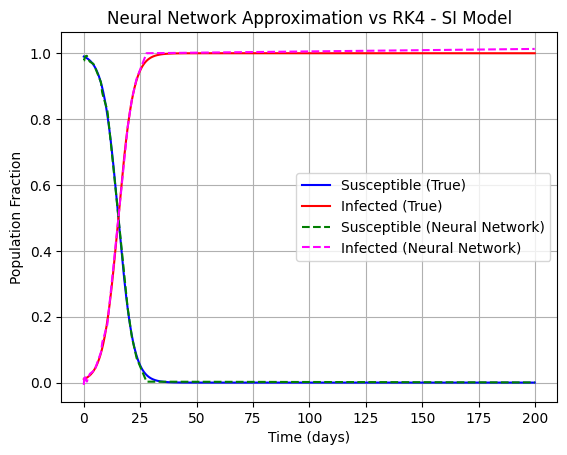

In [24]:
X = np.arange(0, T, dt).reshape(-1, 1)
y_S = S_rk4
y_I = I_rk4

train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_S_train, y_S_val = y_S[:train_size], y_S[train_size:]
y_I_train, y_I_val = y_I[:train_size], y_I[train_size:]

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, np.vstack((y_S_train, y_I_train)).T, epochs=100, batch_size=32, validation_data=(X_val, np.vstack((y_S_val, y_I_val)).T))

y_pred = model.predict(X)

plt.plot(np.arange(0, T, dt), S_rk4, label='Susceptible (True)', color='blue')
plt.plot(np.arange(0, T, dt), I_rk4, label='Infected (True)', color='red')
plt.plot(np.arange(0, T, dt), y_pred[:, 0], label='Susceptible (Neural Network)', color='green', linestyle='--')
plt.plot(np.arange(0, T, dt), y_pred[:, 1], label='Infected (Neural Network)', color='magenta', linestyle='--')
plt.title("Neural Network Approximation vs RK4 - SI Model")
plt.xlabel("Time (days)")
plt.ylabel("Population Fraction")
plt.legend()
plt.grid()
plt.show()

# SEIR Model analysis using Machine Learning

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error (MSE) between RK4 and NN: 4.962661250829115e-07
R² Score between RK4 and NN: 0.9999957084655762


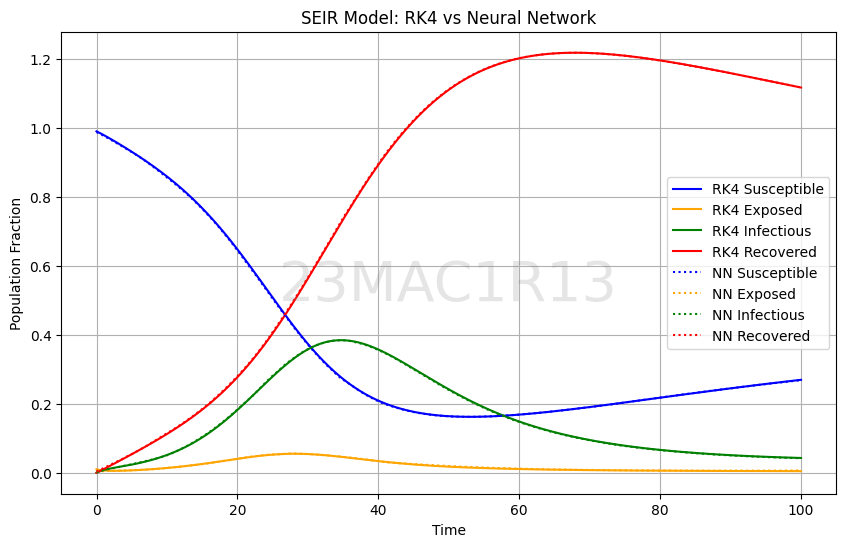

In [25]:
#SEIR Model analysis using Machine Learning
alpha = 0.2
beta = 0.5
mu = 0.01
mu_i = 0.02
nu = 0.01
delta = 0.1

S0 = 0.99
E0 = 0.01
I0 = 0.0
R0 = 0.0

t_start = 0
t_end = 100
dt = 0.1
n_steps = int((t_end - t_start) / dt)

def SEIR(t, y):
    S, E, I, R = y
    dSdt = mu - (alpha * I + mu + nu) * S
    dEdt = alpha * I * S - (beta + mu) * E
    dIdt = E - (beta * mu_i + mu + delta) * I
    dRdt = delta * I + nu * S - mu * R
    return np.array([dSdt, dEdt, dIdt, dRdt])

def RK4_step(t, y, dt):
    k1 = SEIR(t, y)
    k2 = SEIR(t + dt / 2, y + dt / 2 * k1)
    k3 = SEIR(t + dt / 2, y + dt / 2 * k2)
    k4 = SEIR(t + dt, y + dt * k3)
    return y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

S, E, I, R = [S0], [E0], [I0], [R0]
t_values = [t_start]
y = np.array([S0, E0, I0, R0])

for i in range(n_steps):
    y = RK4_step(t_values[-1], y, dt)
    t_values.append(t_values[-1] + dt)
    S.append(y[0])
    E.append(y[1])
    I.append(y[2])
    R.append(y[3])

S = np.array(S)
E = np.array(E)
I = np.array(I)
R = np.array(R)

def create_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(4,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model()

X_train = np.array([S, E, I, R]).T
y_train = X_train[1:]
X_train = X_train[:-1]

print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: None)

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[print_callback])

predicted = model.predict(X_train)

mse_nn = mean_squared_error(y_train, predicted)
r2_nn = r2_score(y_train, predicted)

mse_rk4 = mean_squared_error([S[1:], E[1:], I[1:], R[1:]], predicted.T)
r2_rk4 = r2_score([S[1:], E[1:], I[1:], R[1:]], predicted.T)

print(f"Mean Squared Error (MSE) between RK4 and NN: {mse_rk4}")
print(f"R² Score between RK4 and NN: {r2_rk4}")

plt.figure(figsize=(10, 6))

plt.plot(t_values, S, label='RK4 Susceptible', color='blue')
plt.plot(t_values, E, label='RK4 Exposed', color='orange')
plt.plot(t_values, I, label='RK4 Infectious', color='green')
plt.plot(t_values, R, label='RK4 Recovered', color='red')

plt.plot(t_values[:-1], predicted[:, 0], label='NN Susceptible', linestyle='dotted', color='blue')
plt.plot(t_values[:-1], predicted[:, 1], label='NN Exposed', linestyle='dotted', color='orange')
plt.plot(t_values[:-1], predicted[:, 2], label='NN Infectious', linestyle='dotted', color='green')
plt.plot(t_values[:-1], predicted[:, 3], label='NN Recovered', linestyle='dotted', color='red')

plt.text(50, 0.5, '23MAC1R13', fontsize=40, color='gray', alpha=0.2, ha='center')

plt.title('SEIR Model: RK4 vs Neural Network')
plt.xlabel('Time')
plt.ylabel('Population Fraction')
plt.legend()
plt.grid(True)
plt.show()


# **Parameter Importance in SEIR Model**

In [26]:
 #Importing Important Libraries
import pandas as pd
from scipy.integrate import odeint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Mean Squared Error (MSE): 0.00039458901006993413


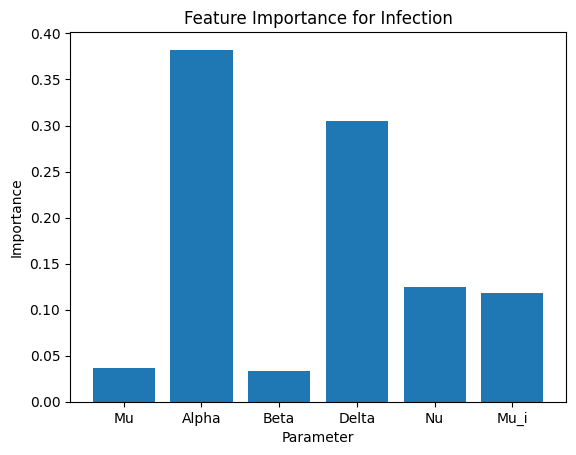

In [31]:
def seir_model(Y, t, mu, alpha, beta, delta, nu, mu_i):
    S, E, I, R = Y
    N = 1
    dS = mu * N - (alpha * I + mu + nu) * S
    dE = alpha * I * S - (beta + mu) * E
    dI = beta * E - (mu + delta + mu_i) * I
    dR = delta * I + nu * S - mu * R
    return [dS, dE, dI, dR]

S0 = 0.9999
E0 = 0.0001
I0 = 0.00001
R0 = 0.00001
Y0 = [S0, E0, I0, R0]
tspan = np.linspace(0, 100, 1000)

num_samples = 500
mu_values = np.random.uniform(0.01, 0.1, num_samples)
alpha_values = np.random.uniform(0.1, 1.0, num_samples)
beta_values = np.random.uniform(0.1, 0.5, num_samples)
delta_values = np.random.uniform(0.1, 0.5, num_samples)
nu_values = np.random.uniform(0.01, 0.1, num_samples)
mu_i_values = np.random.uniform(0.01, 0.1, num_samples)

outcomes = []

for i in range(num_samples):
    mu = mu_values[i]
    alpha = alpha_values[i]
    beta = beta_values[i]
    delta = delta_values[i]
    nu = nu_values[i]
    mu_i = mu_i_values[i]
    sol = odeint(seir_model, Y0, tspan, args=(mu, alpha, beta, delta, nu, mu_i))
    peak_infected = np.max(sol[:, 2])
    outcomes.append([mu, alpha, beta, delta, nu, mu_i, peak_infected])

df = pd.DataFrame(outcomes, columns=["Mu", "Alpha", "Beta", "Delta", "Nu", "Mu_i", "Peak_Infected"])

# Remove 'Sigma' from the features
X = df[["Mu", "Alpha", "Beta", "Delta", "Nu", "Mu_i"]]
y = df["Peak_Infected"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

feature_importance = model.feature_importances_

plt.bar(X.columns, feature_importance)
plt.xlabel('Parameter')
plt.ylabel('Importance')
plt.title('Feature Importance for Infection')
plt.show()

## **Solving SEIQR Model Using the Runge Kutta Method and Plotting the Graph**

Iteration 1, Time 0.00, S=0.9117, E=0.0271, I=0.0211, Q=0.0026, R=0.0374
Iteration 2, Time 0.10, S=0.8749, E=0.0246, I=0.0220, Q=0.0049, R=0.0733
Iteration 3, Time 0.20, S=0.8396, E=0.0225, I=0.0229, Q=0.0069, R=0.1077
Iteration 4, Time 0.30, S=0.8057, E=0.0206, I=0.0236, Q=0.0088, R=0.1407
Iteration 5, Time 0.40, S=0.7733, E=0.0189, I=0.0242, Q=0.0106, R=0.1724
Iteration 6, Time 0.50, S=0.7421, E=0.0175, I=0.0247, Q=0.0121, R=0.2027
Iteration 7, Time 0.60, S=0.7122, E=0.0162, I=0.0251, Q=0.0136, R=0.2319
Iteration 8, Time 0.70, S=0.6835, E=0.0151, I=0.0255, Q=0.0149, R=0.2598
Iteration 9, Time 0.80, S=0.6560, E=0.0140, I=0.0258, Q=0.0161, R=0.2866
Iteration 10, Time 0.90, S=0.6297, E=0.0131, I=0.0261, Q=0.0172, R=0.3122
Iteration 11, Time 1.00, S=0.6044, E=0.0123, I=0.0263, Q=0.0183, R=0.3368
Iteration 12, Time 1.10, S=0.5802, E=0.0116, I=0.0265, Q=0.0192, R=0.3604
Iteration 13, Time 1.20, S=0.5570, E=0.0109, I=0.0266, Q=0.0201, R=0.3831
Iteration 14, Time 1.30, S=0.5347, E=0.0103, I=

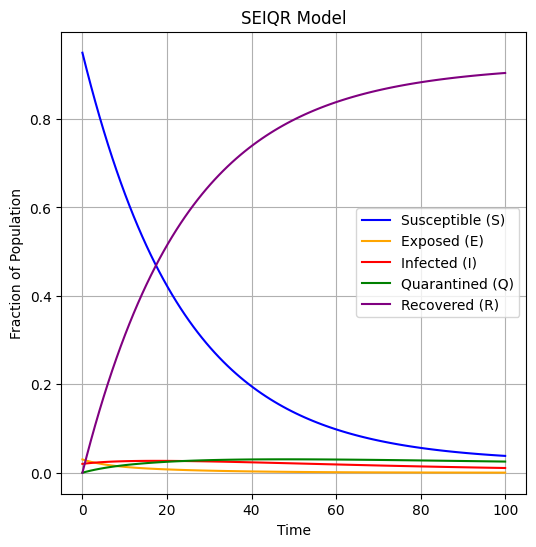

In [ ]:
#Solving SEIQR Model Using the Runge Kutta Method and Plotting the Graph
mu = 0.01
alpha = 0.6
beta = 0.5
gamma = 0.9
mu_i = 0.05
delta = 0.1
mu_q = 0.05
nu = 0.4

S0 = 0.95
E0 = 0.03
I0 = 0.02
Q0 = 0.0
R0 = 0.0

t0 = 0
t_final = 100
h = 0.1

max_iterations = 100

S = np.zeros(max_iterations)
E = np.zeros(max_iterations)
I = np.zeros(max_iterations)
Q = np.zeros(max_iterations)
R = np.zeros(max_iterations)
time = np.linspace(t0, t_final, max_iterations)

S[0] = S0
E[0] = E0
I[0] = I0
Q[0] = Q0
R[0] = R0

def derivatives(S, E, I, Q, R):
    dSdt = mu - (alpha * I + mu + nu) * S
    dEdt = alpha * I * S - (beta + mu + gamma) * E
    dIdt = beta * E - (mu_i + delta + mu) * I
    dQdt = gamma * E - (mu_q + mu) * Q
    dRdt = delta * I + nu * S - mu * R
    return np.array([dSdt, dEdt, dIdt, dQdt, dRdt])

t = t0
iteration = 1
while t < t_final and iteration < max_iterations:
    S_t = S[iteration-1]
    E_t = E[iteration-1]
    I_t = I[iteration-1]
    Q_t = Q[iteration-1]
    R_t = R[iteration-1]

    k1 = h * derivatives(S_t, E_t, I_t, Q_t, R_t)
    k2 = h * derivatives(S_t + 0.5 * k1[0], E_t + 0.5 * k1[1], I_t + 0.5 * k1[2], Q_t + 0.5 * k1[3], R_t + 0.5 * k1[4])
    k3 = h * derivatives(S_t + 0.5 * k2[0], E_t + 0.5 * k2[1], I_t + 0.5 * k2[2], Q_t + 0.5 * k2[3], R_t + 0.5 * k2[4])
    k4 = h * derivatives(S_t + k3[0], E_t + k3[1], I_t + k3[2], Q_t + k3[3], R_t + k3[4])

    S_new = S_t + (1/6) * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    E_new = E_t + (1/6) * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    I_new = I_t + (1/6) * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2])
    Q_new = Q_t + (1/6) * (k1[3] + 2*k2[3] + 2*k3[3] + k4[3])
    R_new = R_t + (1/6) * (k1[4] + 2*k2[4] + 2*k3[4] + k4[4])

    S[iteration] = S_new
    E[iteration] = E_new
    I[iteration] = I_new
    Q[iteration] = Q_new
    R[iteration] = R_new

    print(f"Iteration {iteration}, Time {t:.2f}, S={S_new:.4f}, E={E_new:.4f}, I={I_new:.4f}, Q={Q_new:.4f}, R={R_new:.4f}")

    t += h
    iteration += 1

plt.figure(figsize=(6, 6))

plt.plot(time[:iteration], S[:iteration], label='Susceptible (S)', color='blue')
plt.plot(time[:iteration], E[:iteration], label='Exposed (E)', color='orange')
plt.plot(time[:iteration], I[:iteration], label='Infected (I)', color='red')
plt.plot(time[:iteration], Q[:iteration], label='Quarantined (Q)', color='green')
plt.plot(time[:iteration], R[:iteration], label='Recovered (R)', color='purple')

plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SEIQR Model')
plt.legend()

plt.grid(True)
plt.show()
